In [54]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
samp = np.loadtxt('170170.txt', usecols=2)
MIN=samp.min();MAX=samp.max();MEAN=samp.mean();STD=samp.std();VAR=samp.var()
MIN,MAX,MEAN,STD,VAR

(909.86, 6266.63, 2510.7941, 979.0443031253436, 958527.7474821898)

In [56]:
param = stats.gamma.fit(samp,floc=0) # distribution fitting

x = np.linspace(MIN,MAX,1000) # fitted distribution
pdf_fitted = stats.gamma.pdf(x, *param)

In [57]:
print(param[0], 1/param[2], param[0]*param[2])

6.657976480626984 0.002651741327824127 2510.7941


Power_divergenceResult(statistic=8.723105743254727, pvalue=0.27315195895983335)
10.679901629603208


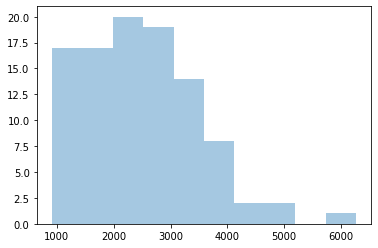

In [58]:
# chi-square
counts, edges, plot = plt.hist(samp,bins=10,alpha=0.4)

summ = 0
for i in range(0,10):
    upper_cdf = stats.gamma.cdf(edges[i+1], *param)
    lower_cdf = stats.gamma.cdf(edges[i], *param)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100

exp_counts = np.array([])
for i in range(0,10):
    upper_cdf = stats.gamma.cdf(edges[i+1], *param)
    lower_cdf = stats.gamma.cdf(edges[i], *param)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=2))
print(chi_statistic)

In [59]:
stats.kstest(samp,'gamma',args = (param[0],param[1],param[2]))

KstestResult(statistic=0.056650002344195344, pvalue=0.905297795969515)

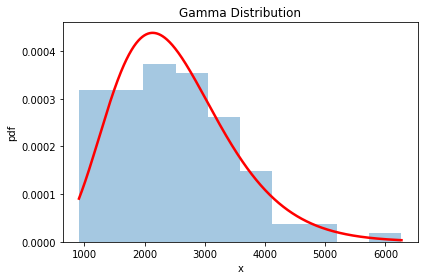

In [60]:
fig,axes = plt.subplots()

axes.plot(x,pdf_fitted,'r',lw=2.5)
axes.set_xlabel('x')
axes.set_ylabel('pdf')
axes.set_title('Gamma Distribution')
fig.tight_layout()

plt.hist(samp,alpha=0.4,density=True)
fig.savefig("s5_gamma.png",dpi=400)

In [61]:
k = 2
logLik = np.sum(stats.gamma.logpdf(samp, *param)) 
aic = 2*k - 2*(logLik)
aic

1653.4813665088473

In [62]:
dis = stats.gamma.ppf(0.98,*param)
dis

4886.583373797843